# Проект "Принятие решений в бизнесе"

# Введение

Мы получили данные интренет-магазина о посетителях и покупателях. Основной задачей является повышение выручки интернет-магазина. Для этого будет проведена приоритизация гипотез и А/В тест.

<a id="ogl"></a>
## Оглавление

* [Оглавление](#ogl)
* [Загрузка данных и подготовка их к анализу](#setup)
* [Приоритизация гипотез](#analisys_data)
    * [Применяем фреймворк ICE для приоритизации гипотез](#analisys_data1)
    * [Применяем фреймворк RICE для приоритизации гипотез](#analisys_data2)
* [Анализ А/В теста](#ab)
    * [График кумулятивной выручки по группам](#ab1)
    * [График кумулятивного среднего чека по группам](#ab2)
    * [График относительного изменения кумулятивного среднего чека группы В к группе А](#ab3)
    * [График кумулятивного среднего количества заказов на посетителя по группам](#ab4)
    * [График относительного изменения кумулятивного среднего количества заказов на посетителя группы В к группе А](#ab5)
    * [Точечный график количества заказов на пользователя](#ab6)
    * [95-й и 99-й перцентили количества заказов на пользователя](#ab7)
    * [Точечный график стоимостей заказов](#ab8)
    * [95-й и 99-й перцентили стоимости заказов](#ab9)
    * [Статистическая значимость различий в среднем количестве заказов на посетителя между группами по "сырым" данным](#ab10)
    * [Статистическая значимость различий в среднем чеке заказа между группами по "сырым" данным](#ab11)
    * [Статистическая значимость различий в среднем количестве заказов на посетителя между группами по "очищенным" данным](#ab12)
    * [Статистическая значимость различий в среднем чеке заказа между группами по "очищенным" данным](#ab13)
* [Заключение](#vivod)

<a id="setup"></a>
## Загрузка данных и подготовка их к анализу

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy import stats as st
import numpy as np
import datetime as dt
pd.options.display.max_colwidth = 200
import warnings
warnings.simplefilter('ignore')

In [2]:
hypothesis = pd.read_csv('D:/Datasets/6. Принятие решений в бизнесе/hypothesis.csv')
orders = pd.read_csv('D:/Datasets/6. Принятие решений в бизнесе/orders.csv')
visitors = pd.read_csv('D:/Datasets/6. Принятие решений в бизнесе/visitors.csv')

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


In [4]:
hypothesis.head(10)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
# переименуем столбцы
hypothesis = hypothesis.rename(columns={
    'Hypothesis': 'hypothesis', 
    'Reach': 'reach', 
    'Impact': 'impact',
    'Confidence': 'confidence',
    'Efforts': 'efforts'
})

In [6]:
print('Количество пропусков:', hypothesis.isna().sum(), 'Количество дубликатов:', hypothesis.duplicated().sum(), sep='\n')

Количество пропусков:
hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64
Количество дубликатов:
0


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [9]:
print('Количество пропусков:', orders.isna().sum(), 'Количество дубликатов:', orders.duplicated().sum(), sep='\n')

Количество пропусков:
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
Количество дубликатов:
0


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [12]:
print('Количество пропусков:', visitors.isna().sum(), 'Количество дубликатов:', visitors.duplicated().sum(), sep='\n')

Количество пропусков:
date        0
group       0
visitors    0
dtype: int64
Количество дубликатов:
0


Вывод:

В нашем распоряжении три таблицы: hypothesis с гипотезами, orders и visitors с данными о заказах и количестве пользователей. Проведена предобработка данных. Пропусков и дубликатов не найдено.

<a id="analisys_data"></a>
##  Приоритизация гипотез

<a id="analisys_data1"></a>
### Применяем фреймворк ICE для приоритизации гипотез

In [13]:
hypothesis.head(10)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Фреймворк ICE рассчитывается по формуле:
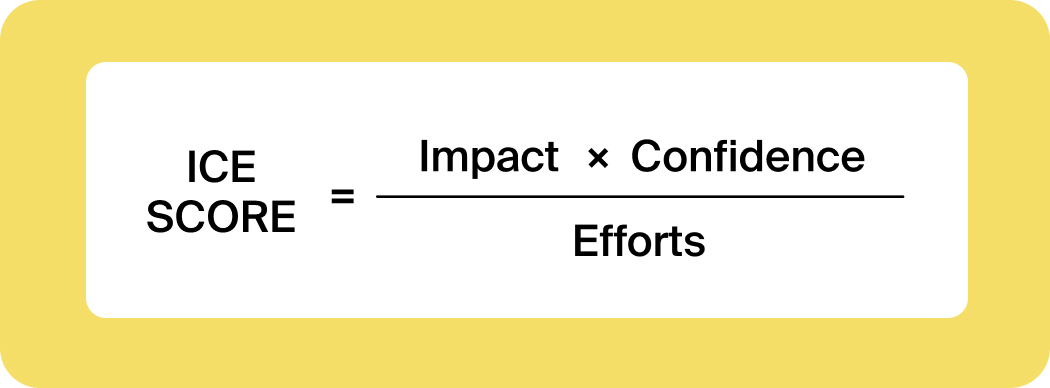

In [14]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
print(hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

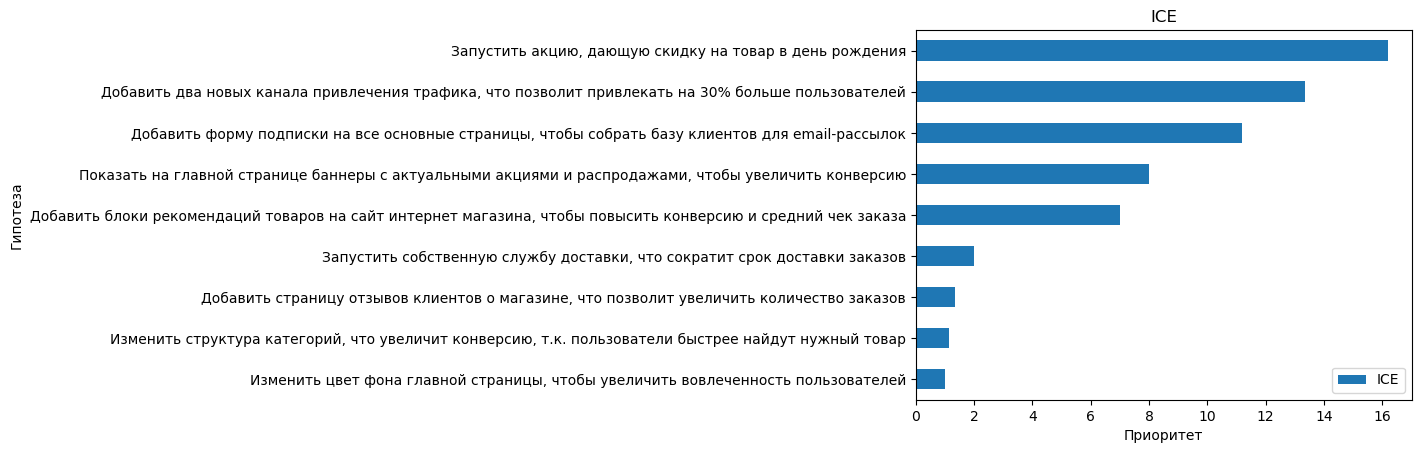

In [15]:
ax = hypothesis[['hypothesis', 'ICE']].set_index('hypothesis').sort_values('ICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE')
plt.show()

<a id="analisys_data2"></a>
### Применяем фреймворк RICE для приоритизации гипотез

Фреймворк RICE рассчитывается по формуле:
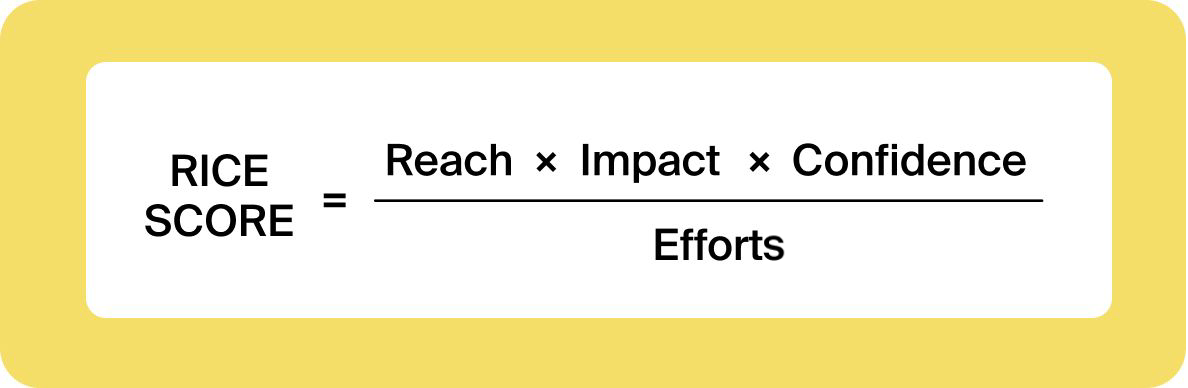

In [16]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

print(hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

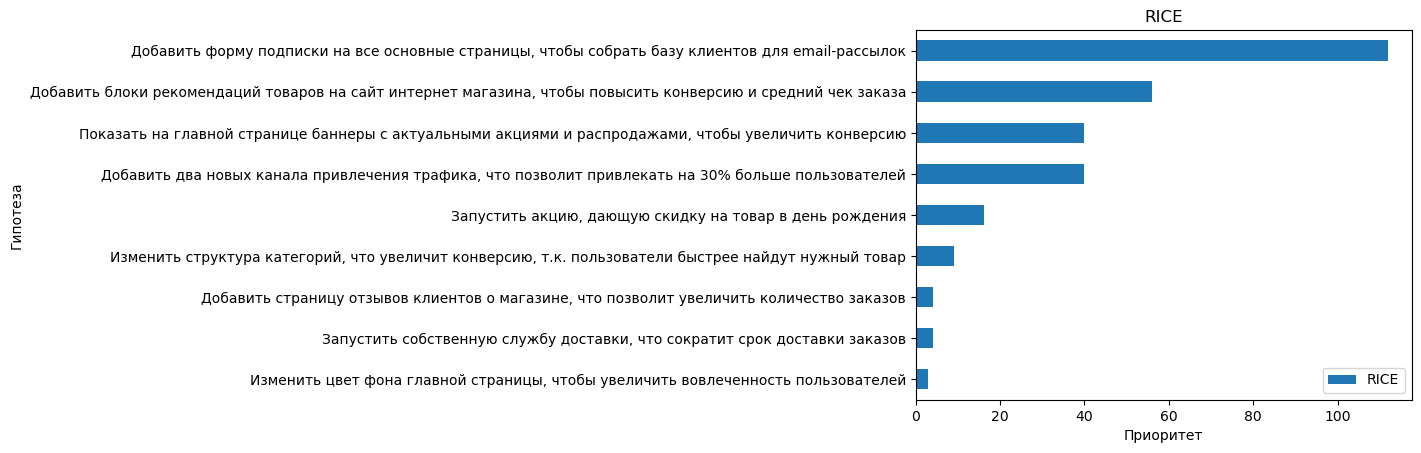

In [17]:
ax = hypothesis[['hypothesis', 'RICE']].set_index('hypothesis').sort_values('RICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('RICE')
plt.show()

Вывод:
при применении фреймворка RICE изменился топ перспективных гипотез, так как метод RICE учитывает охват аудитории. То есть выявились гипотезы, которые охватят больше аудитории.

<a id="ab"></a>
## Анализ A/B-теста

In [18]:
visitorsA = orders[orders['group']=='A']['visitorId']
visitorsB = orders[orders['group']=='B']['visitorId']

In [19]:
# выделям пользователей, которые попали в обе группы
visitorsAB = orders.loc[orders['visitorId'].isin(visitorsA) & orders['visitorId'].isin(visitorsB),'visitorId'].unique()

In [20]:
allusers = orders['visitorId'].unique()

In [21]:
len(allusers)

1031

In [22]:
# смотрим какой будет процент удаленных пользователей
print('Процент удаленных пользователей:', "{0:.2%}".format(len(visitorsAB) / len(allusers)))

Процент удаленных пользователей: 5.63%


In [23]:
# удаляем заказы пользователей, которые оказались в обеих группах
filteredorders = orders[~orders['visitorId'].isin(visitorsAB)]

In [24]:
# смотрим какой будет процент удаленных заказов
print('Процент удаленных заказов:', "{0:.2%}".format((len(orders) - len(filteredorders)) / len(orders)))

Процент удаленных заказов: 15.12%


In [25]:
# Переводим столбцы с датами в нужный формат
orders['date'] = orders['date'].map(
   lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

filteredorders['date'] = filteredorders['date'].map(
   lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [26]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = filteredorders[['date','group']].drop_duplicates() 

In [27]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: filteredorders[np.logical_and(filteredorders['date'] <= x['date'], filteredorders['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), 
    axis=1).sort_values(by=['date','group'])

In [28]:
ordersAggregated.head(5)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [29]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [30]:
visitorsAggregated.head(5)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [31]:
# объединяем кумулятивные данные в одной таблице и переименовываем столбцы
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [32]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


<a id="ab1"></a>
### График кумулятивной выручки по группам

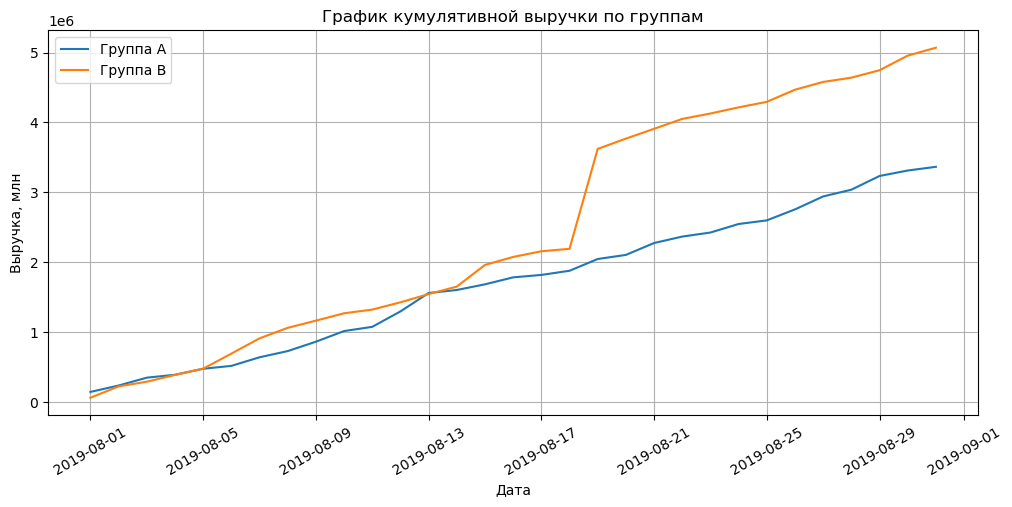

In [33]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12, 5))
plt.grid(True)
plt.title('График кумулятивной выручки по группам', fontsize=12)
plt.xlabel('Дата')
plt.xticks(rotation=30)
plt.ylabel('Выручка, млн')
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend(['Группа А', 'Группа B']);

Вывод: Группа А растет линейно. В группе B наблюдается резкий скачек.

<a id="ab2"></a>
### График кумулятивного среднего чека по группам

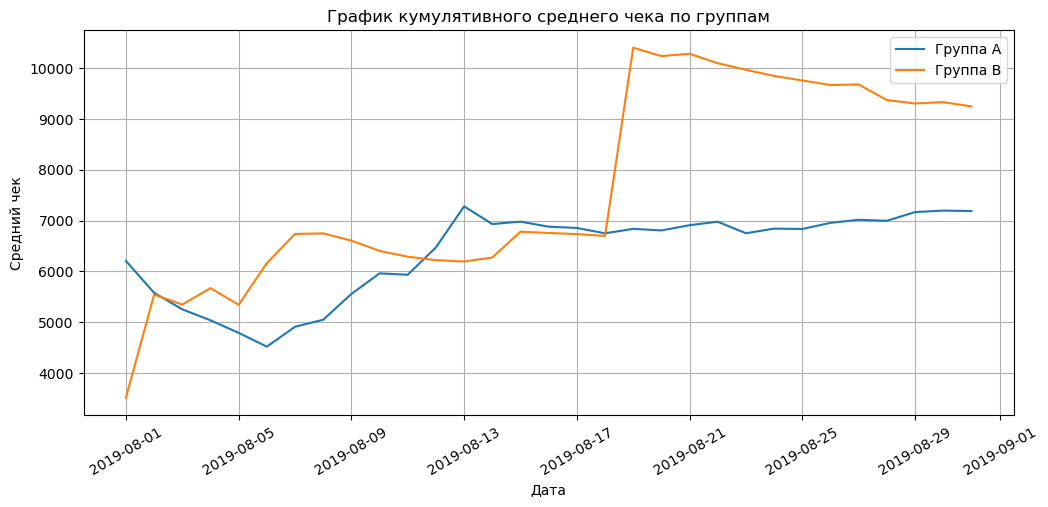

In [34]:
plt.figure(figsize=(12, 5))
plt.grid(True)
plt.title('График кумулятивного среднего чека по группам', fontsize=12)
plt.xlabel('Дата')
plt.xticks(rotation=30)
plt.ylabel('Средний чек')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')
plt.legend(['Группа А', 'Группа B']); 

Вывод: Видим аналогичную картину. Группа B делает резкий взлет.

<a id="ab3"></a>
### График относительного изменения кумулятивного среднего чека группы B к группе A

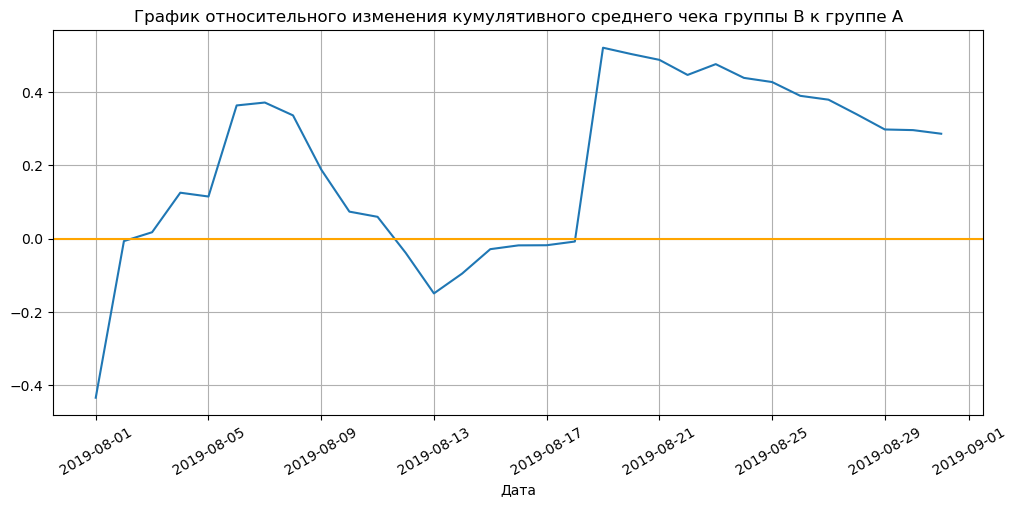

In [35]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', 
                                                   how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(12, 5))
plt.grid(True)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=12)
plt.xlabel('Дата')
plt.xticks(rotation=30)
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB']) / 
         (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='orange', linestyle='-');

Вывод: относительное изменение кумулятивного среднего чека группы В по отношению к группе А так же сильно расчет во второй половине августа.

<a id="ab4"></a>
### График кумулятивного среднего количества заказов на посетителя по группам

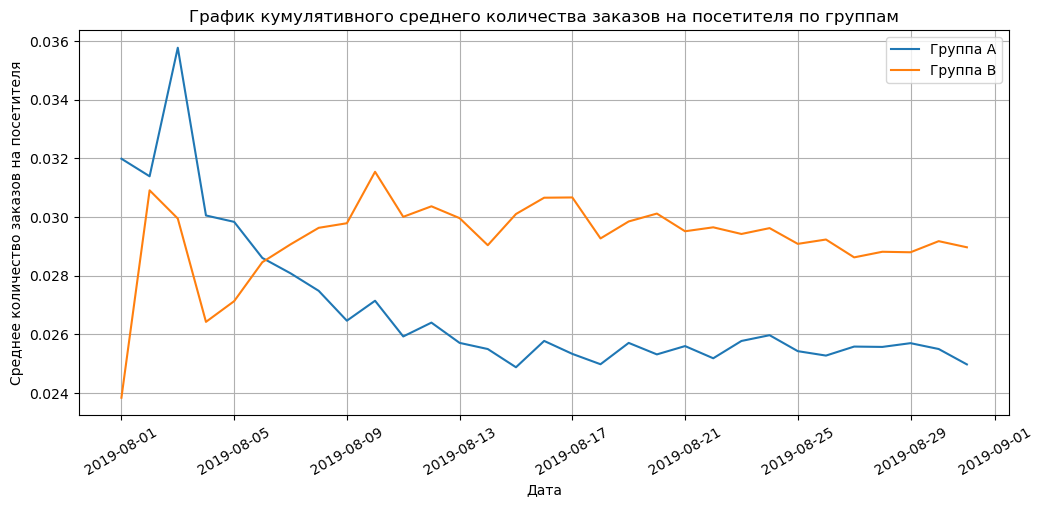

In [36]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(12, 5))
plt.grid(True)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам', fontsize=12)
plt.xlabel('Дата')
plt.xticks(rotation=30)
plt.ylabel('Среднее количество заказов на посетителя')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend(['Группа А', 'Группа B']);

Вывод:

На графике видно, что в начале периода среднее количество заказов на посетителя в группе А было выше, чем в группе В. Однако далее картина меняется. Среднее количество заказов в группе В стало выше, чем в группе А.

<a id="ab5"></a>
### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

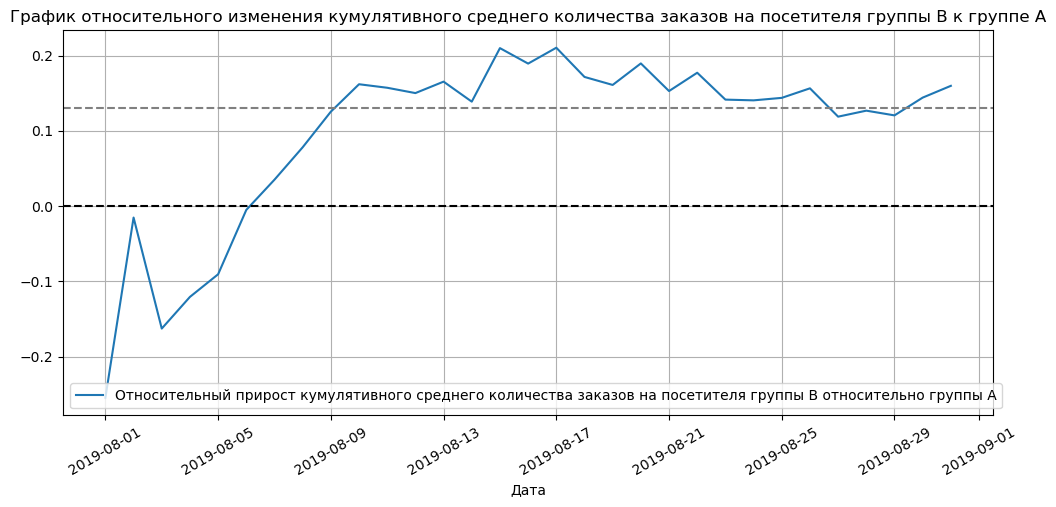

In [37]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', right_on='date', 
                                                                           how='left', suffixes=['A', 'B'])

plt.figure(figsize=(12, 5))
plt.grid(True)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A', 
          fontsize=12)
plt.xlabel('Дата')
plt.xticks(rotation=30)
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A")
plt.legend()


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.13, color='grey', linestyle='--');

Вывод: относительное изменение кумулятивного среднего количества заказов группы B начинает расти и к концу периода стабилизируется на отметке +13% по отношению к группе А.

<a id="ab6"></a>
### Точечный график количества заказов по пользователям

In [38]:
ordersByUsers = (
    filteredorders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

In [39]:
print(ordersByUsers.sort_values(by='transactionId', ascending=False).head(10))

      visitorId  transactionId
908  3967698036              3
55    249864742              3
478  2108163459              3
687  2988190573              3
890  3908431265              3
138   611059232              3
632  2742574263              3
157   678354126              2
323  1404560065              2
452  1985475298              2


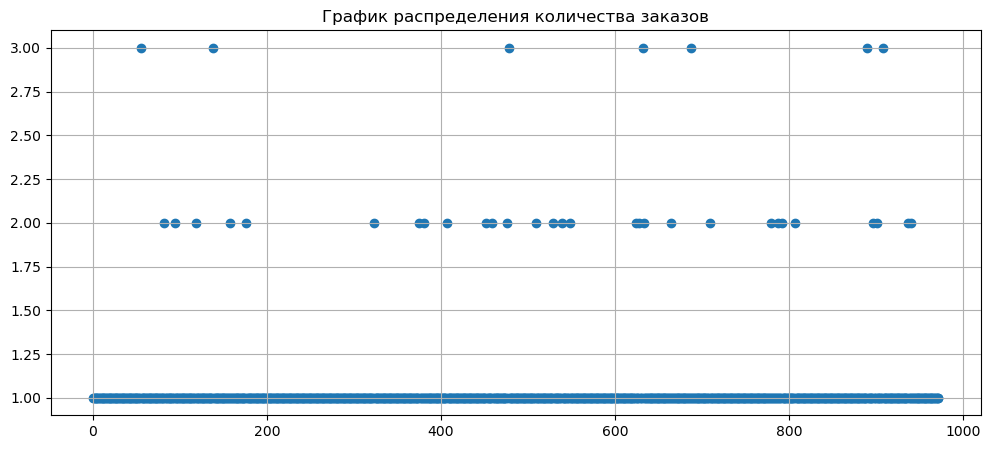

In [40]:
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(12, 5))
plt.grid(True)
plt.title('График распределения количества заказов', fontsize=12)
plt.scatter(x_values, ordersByUsers['transactionId']);

Вывод: 

Чаще всего пользователи делают 1 заказ, так же есть довольно большая группа пользователей, совершающих по 2 заказа. Те кто совершают 4 заказа и более являются аномальными.

<a id="ab7"></a>
### 95-й и 99-й перцентили количества заказов на пользователя

In [41]:
print('95-й перцентиль: %.2f' % (np.percentile(ordersByUsers['transactionId'], [95])))
print('99-й перцентиль: %.2f' % (np.percentile(ordersByUsers['transactionId'], [99])))

95-й перцентиль: 1.00
99-й перцентиль: 2.00


Вывод: не более 5% пользователей оформляли больше чем 1 заказ и 1% пользователей оформляли больше 2 заказов. Пользователей, которые делали 3 заказа будем считать аномальными.

<a id="ab8"></a>
### Точечный график стоимостей заказов

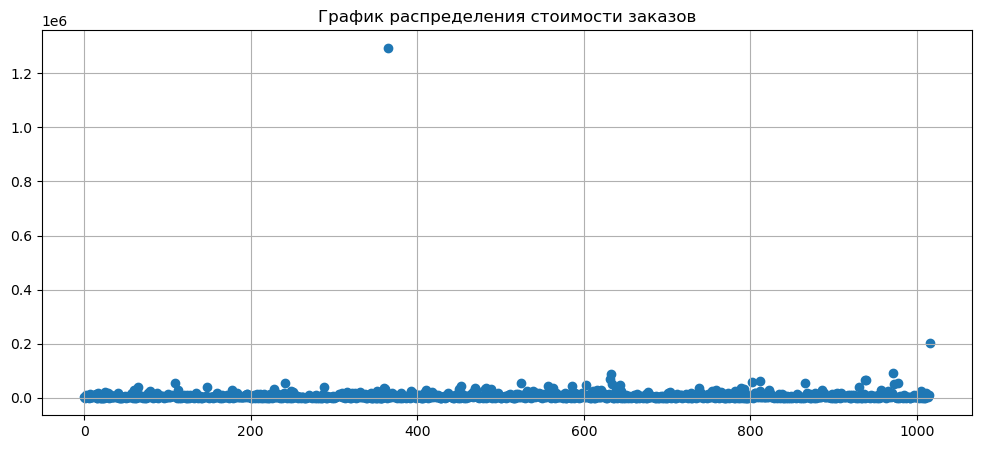

In [42]:
x_values = pd.Series(range(0, len(filteredorders['revenue'])))

plt.figure(figsize=(12, 5))
plt.grid(True)
plt.title('График распределения cтоимости заказов', fontsize=12)
plt.scatter(x_values, filteredorders['revenue']);

Вывод: на графике видно 2 выброса.

<a id="ab9"></a>
### 95-й и 99-й перцентили стоимости заказов

In [43]:
print('95 перцентиль: %.2f' % (np.percentile(filteredorders['revenue'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(filteredorders['revenue'], [99])))

95 перцентиль: 26785.00
99 перцентиль: 53904.00


Вывод: Не более 5% заказов дороже 26 785 рублей и не более 1% дороже 53 904 рублей. Все заказы дороже 58 000 рублей будем считать аномальными.

<a id="ab10"></a>
### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [44]:
# Посетители группы А по дням
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# Создаем таблицу с кумулятивным накоплением посетителей группы А по дням
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# Посетители группы В по дням
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# Создаем таблицу с кумулятивным накоплением посетителей группы В по дням
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [45]:
# Заказы группы А по дням
ordersADaily = (
    filteredorders[filteredorders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# Создаем таблицу с кумулятивным накоплением суммы заказов группы А по дням
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# Заказы группы В по дням
ordersBDaily = (
    filteredorders[filteredorders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# Создаем таблицу с кумулятивным накоплением суммы заказов группы В по дням
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [46]:
# Собираем все данные в одной таблице
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [47]:
# Таблица пользователей группы А с количеством заказов
ordersByUsersA = (
    filteredorders[filteredorders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

# Таблица пользователей группы В с количеством заказов
ordersByUsersB = (
    filteredorders[filteredorders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [48]:
ordersByUsersA['orders'].unique()

array([1, 2, 3], dtype=int64)

In [49]:
ordersByUsersA['orders']

0      1
1      1
2      1
3      1
4      1
      ..
440    1
441    1
442    1
443    1
444    1
Name: orders, Length: 445, dtype: int64

In [50]:
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), 
                               name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), 
                               name='orders')],axis=0) 

In [51]:
sampleB

0        1
1        1
2        1
3        1
4        1
        ..
18383    0
18384    0
18385    0
18386    0
18387    0
Name: orders, Length: 18916, dtype: int64

Сформулируем гипотезы.

Нулевая: различий в среднем количестве заказов между группами нет. 

Альтернативная: различия в среднем количестве между группами есть.

In [52]:
alpha = 0.05

results1 = stats.mannwhitneyu(sampleA, sampleB)[1]

print(round(results1, 3))

if results1 < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
print('Прирост среднего количества заказов группы В по отношению к группе А:', 
      "{0:.2%}".format(sampleB.mean() / sampleA.mean() - 1))

0.011
Отвергаем нулевую гипотезу: разница статистически значима
Прирост среднего количества заказов группы В по отношению к группе А: 15.98%


Вывод: 

Отвергаем нулевую гипотезу. По "сырым" данным различия в количестве заказов между группами А и В есть. Количество заказов в группе В на 16% больше чем в группе А.

<a id="ab11"></a>
### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы.

Нулевая: различий в среднем чеке заказа между группами нет. 

Альтернативная: различия в среднем чеке между группами есть.

In [53]:
alpha = 0.05

results2 = stats.mannwhitneyu(filteredorders[filteredorders['group']=='A']['revenue'], 
                              filteredorders[filteredorders['group']=='B']['revenue'])[1]

print(round(results2, 3))

if results2 < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
print('Прирост среднего чека заказов группы В по отношению к группе А:', 
      '{0:.2%}'.format(filteredorders[filteredorders['group']=='B']['revenue'].mean() / 
                       filteredorders[filteredorders['group']=='A']['revenue'].mean()-1)) 

0.829
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Прирост среднего чека заказов группы В по отношению к группе А: 28.66%


Вывод: 

Отвергнуть нулевую гипотезу не получилось. Средние чеки в группах А и В не отличаются. Несмотря на то, что средний чек группы В на 28,7% выше среднего чека группы А, наблюдаемое различие не является статистически значимым.

<a id="ab12"></a>
### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [54]:
revenue_lim = np.percentile(filteredorders['revenue'], 95)

# Определяем количество аномальных пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = filteredorders[filteredorders['revenue'] > revenue_lim]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print('Аномальные пользователи:', abnormalUsers.shape[0]) 

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64
Аномальные пользователи: 58


Всего 58 аномальных пользователей

In [55]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [56]:
sampleAFiltered

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18709, dtype: int64

Сформулируем гипотезы для "очищенных" данных.

Нулевая: различий в среднем количестве заказов между группами нет. 

Альтернативная: различия в среднем количестве между группами есть.

In [57]:
alpha = 0.05

results3 = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print(round(results3, 3))

if results3 < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    
print('Прирост среднего количества заказов на посетителя группы В по отношению к группе А по «очищенным» данным:', 
      '{0:.2%}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.012
Отвергаем нулевую гипотезу: разница статистически значима
Прирост среднего количества заказов на посетителя группы В по отношению к группе А по «очищенным» данным: 18.19%


Вывод: Результаты по сравнению с "сырыми" данными практически не изменились. По "очищенным" данным различия в количестве заказов между группами А и В так же есть. Количество заказов в группе В стало больше на 18,2% по сравнению с группой А.

<a id="ab13"></a>
### Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Сформулируем гипотезы для "очищенных" данных.

Нулевая: различий в среднем чеке заказа между группами нет. 

Альтернативная: различия в среднем чеке между группами есть.

In [58]:
alpha = 0.05

results4 = stats.mannwhitneyu(
    filteredorders[np.logical_and(filteredorders['group'] == 'A', 
                                  np.logical_not(filteredorders['visitorId'].isin(abnormalUsers)))]['revenue'], 
    filteredorders[np.logical_and(filteredorders['group'] == 'B', 
                                  np.logical_not(filteredorders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]
print(round(results4, 3))

if results4 < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 
    
print('Прирост среднего чека заказов группы В по отношению к группе А по «очищенным» данным:', 
      "{0:.2%}".format(
filteredorders[np.logical_and(filteredorders['group'] == 'B', 
                              np.logical_not(filteredorders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() 
/ filteredorders[np.logical_and(filteredorders['group'] == 'A', 
                                np.logical_not(filteredorders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.646
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
Прирост среднего чека заказов группы В по отношению к группе А по «очищенным» данным: -4.85%


Вывод: 

P-value увеличился. Различий в среднем чеке заказа между группами по-прежнему нет. В очищенных данных мы видим, что средняя цена чека в группе В стала ниже на 4,85% по сравнению с группой А. Снижение произошло с 25,9% до -4,85%.

<a id="vivod"></a>
## Заключение

В начале мы провели приоритезацию гипотез, чтобы определить самую наилучшую Приоритизацию провели с помозью фреймворков ICE и RICE. Данные методики сформировали разные списки гипотез, так как фреймворки учитывают разные параметры. RICE дополнительно учитывает параметр Reach — скольких пользователей затронет изменение, которое вы хотите внести.

По результатам А/В теста были сделаны следующие выводы:

    - кумулятивная выручка и средний чек группы В выше чем в группе А;
    - кумулятивное среднее количество заказов на человека в группе В выше чем в группе А;
    - среднее количество заказов в группе В выше на ≈15% чем в группе А.

Проведя статистический анализ результатов теста мы пришли к выводам:

    Статистические значимые различия в среднем количестве заказов между группами А и В есть, как на "сырых", так и на "очищенных "данных.
    Статистических значимых различий в среднем чеке заказа между группами А и В нет, как на "сырых", так и на "очищенных" данных.

Таким образом мы можем остановить тест и зафиксировать победу группы В